<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#The-data" data-toc-modified-id="The-data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>The data</a></span><ul class="toc-item"><li><span><a href="#The-Aim" data-toc-modified-id="The-Aim-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>The Aim</a></span></li><li><span><a href="#Number-of-user_ids-per-Source" data-toc-modified-id="Number-of-user_ids-per-Source-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Number of user_ids per Source</a></span></li><li><span><a href="#Count-of-Clicks-vs-No-Clicks-per-Source" data-toc-modified-id="Count-of-Clicks-vs-No-Clicks-per-Source-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Count of Clicks vs No-Clicks per Source</a></span></li><li><span><a href="#Total-Clicks-for-each-Advertisement-Type" data-toc-modified-id="Total-Clicks-for-each-Advertisement-Type-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Total Clicks for each Advertisement Type</a></span></li><li><span><a href="#Clicks-vs-No-Clicks-Through-the-Week" data-toc-modified-id="Clicks-vs-No-Clicks-Through-the-Week-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Clicks vs No-Clicks Through the Week</a></span></li><li><span><a href="#Plotting-weekly-results" data-toc-modified-id="Plotting-weekly-results-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Plotting weekly results</a></span></li></ul></li></ul></div>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# The data

This project is from an e-commerce business's advertising campaign. Two variations of an ad - version **A** and version **B** - have been created.

The advertisements are placed on three websites:
* Google
* Facebook
* Twitter
* also sent to customers via email.

## The Aim
* Find which variation of the ad has brought more people to the site
* Find out what source is producing the most ad clicks.

In [2]:
ad_clicks = pd.read_csv('AdClicks.csv')
ad_clicks.head()

,user_id,utm_source,day,ad_click_timestamp,experimental_group
0,008b7c6c-7272-471e-b90e-930d548bd8d7,google,6 - Saturday,7:18,A
1,009abb94-5e14-4b6c-bb1c-4f4df7aa7557,facebook,7 - Sunday,NaN,B
2,00f5d532-ed58-4570-b6d2-768df5f41aed,twitter,2 - Tuesday,NaN,A
3,011adc64-0f44-4fd9-a0bb-f1506d2ad439,google,2 - Tuesday,NaN,B
4,012137e6-7ae7-4649-af68-205b4702169c,facebook,7 - Sunday,NaN,B


## Number of user_ids per Source

In [3]:
# get the count of each source of customer
utm_source_counts = ad_clicks.groupby('utm_source').user_id.count().reset_index()
print(utm_source_counts)

  utm_source  user_id
0      email      255
1   facebook      504
2     google      680
3    twitter      215


In [4]:
# add a new column called is_click which is True if there is a timestamp for that user
# and False if the timestamp column is null:
ad_clicks['is_click'] = ad_clicks.ad_click_timestamp.apply(lambda x: False if type(x)==float else True)

In [5]:
ad_clicks.head()

,user_id,utm_source,day,ad_click_timestamp,experimental_group,is_click
0,008b7c6c-7272-471e-b90e-930d548bd8d7,google,6 - Saturday,7:18,A,True
1,009abb94-5e14-4b6c-bb1c-4f4df7aa7557,facebook,7 - Sunday,NaN,B,False
2,00f5d532-ed58-4570-b6d2-768df5f41aed,twitter,2 - Tuesday,NaN,A,False
3,011adc64-0f44-4fd9-a0bb-f1506d2ad439,google,2 - Tuesday,NaN,B,False
4,012137e6-7ae7-4649-af68-205b4702169c,facebook,7 - Sunday,NaN,B,False


In [6]:
# looking to find out the percentage of people coming from each utm_source
clicks_by_source = ad_clicks.groupby(['utm_source', 'is_click']).user_id.count().reset_index()
print(clicks_by_source.head())

  utm_source  is_click  user_id
0      email     False      175
1      email      True       80
2   facebook     False      324
3   facebook      True      180
4     google     False      441


## Count of Clicks vs No-Clicks per Source

In [7]:
# pivot the above df around the "is_click" column to more clearly show the counts of clicks from each source
clicks_pivot = clicks_by_source.pivot(columns='is_click', index='utm_source', values='user_id')
print(clicks_pivot.head())

is_click    False  True 
utm_source              
email         175     80
facebook      324    180
google        441    239
twitter       149     66


In [8]:
# create a new column which is equal to the percent of users who clicked from each utm_source:
clicks_pivot['percent_clicked'] = clicks_pivot[True] / (clicks_pivot[True] + clicks_pivot[False])

In [9]:
clicks_pivot.head()

is_click,False,True,percent_clicked
utm_source,,,
email,175,80,0.313725
facebook,324,180,0.357143
google,441,239,0.351471
twitter,149,66,0.306977


In [10]:
a_b_count = ad_clicks.groupby('experimental_group').user_id.count().reset_index()
print(a_b_count)

  experimental_group  user_id
0                  A      827
1                  B      827


## Total Clicks for each Advertisement Type

In [11]:
# use the is_click column defined earlier to see whether more people clicked on ad A or ad B:
most_clicks = ad_clicks.groupby('experimental_group').is_click.sum().reset_index()
print(most_clicks)

  experimental_group  is_click
0                  A     310.0
1                  B     255.0


**Group A** has accounted for more ad clicks, and so this version of the ad appears to be more successful. 

In [12]:
# create 2 new DataFrames which contain only the result for their respective ad:
a_clicks = ad_clicks[ad_clicks.experimental_group == 'A']
b_clicks = ad_clicks[ad_clicks.experimental_group == 'B']

In [13]:
a_clicks.head()

,user_id,utm_source,day,ad_click_timestamp,experimental_group,is_click
0,008b7c6c-7272-471e-b90e-930d548bd8d7,google,6 - Saturday,7:18,A,True
2,00f5d532-ed58-4570-b6d2-768df5f41aed,twitter,2 - Tuesday,NaN,A,False
5,013b0072-7b72-40e7-b698-98b4d0c9967f,facebook,1 - Monday,NaN,A,False
6,0153d85b-7660-4c39-92eb-1e1acd023280,google,4 - Thursday,NaN,A,False
7,01555297-d6e6-49ae-aeba-1b196fdbb09f,google,3 - Wednesday,NaN,A,False


In [14]:
b_clicks.head()

,user_id,utm_source,day,ad_click_timestamp,experimental_group,is_click
1,009abb94-5e14-4b6c-bb1c-4f4df7aa7557,facebook,7 - Sunday,NaN,B,False
3,011adc64-0f44-4fd9-a0bb-f1506d2ad439,google,2 - Tuesday,NaN,B,False
4,012137e6-7ae7-4649-af68-205b4702169c,facebook,7 - Sunday,NaN,B,False
9,01a210c3-fde0-4e6f-8efd-4f0e38730ae6,email,2 - Tuesday,15:21,B,True
10,01adb2e7-f711-4ae4-a7c6-29f48457eea1,google,3 - Wednesday,NaN,B,False


## Clicks vs No-Clicks Through the Week

In [15]:
# the following gets the real insight of the A/B test
# find the clicks per day for each ad (A or B) and then pivot the table to show the information more clearly
clicks_day_a = a_clicks.groupby(['is_click', 'day']).user_id.count().reset_index()
clicks_day_a_pivot = clicks_day_a.pivot(columns='day', index='is_click', values='user_id')
#clicks_day_a_pivot
clicks_day_b = b_clicks.groupby(['is_click', 'day']).user_id.count().reset_index()
clicks_day_b_pivot = clicks_day_b.pivot(columns='day', index='is_click', values='user_id')
clicks_day_a_pivot

day,1 - Monday,2 - Tuesday,3 - Wednesday,4 - Thursday,5 - Friday,6 - Saturday,7 - Sunday
is_click,,,,,,,
False,70,76,86,69,77,73,66
True,43,43,38,47,51,45,43


In [16]:
clicks_day_b_pivot

day,1 - Monday,2 - Tuesday,3 - Wednesday,4 - Thursday,5 - Friday,6 - Saturday,7 - Sunday
is_click,,,,,,,
False,81,74,89,87,90,76,75
True,32,45,35,29,38,42,34


In [17]:
a = clicks_day_a.groupby(['day', 'is_click']).user_id.sum().reset_index()

In [18]:
clicks_day_a

,is_click,day,user_id
0,False,1 - Monday,70
1,False,2 - Tuesday,76
2,False,3 - Wednesday,86
3,False,4 - Thursday,69
4,False,5 - Friday,77
5,False,6 - Saturday,73
6,False,7 - Sunday,66
7,True,1 - Monday,43
8,True,2 - Tuesday,43
9,True,3 - Wednesday,38


## Plotting weekly results

In [19]:
sns.set(style='darkgrid')

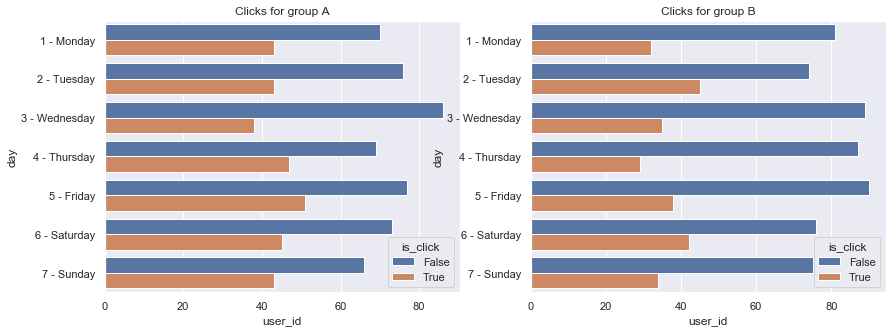

In [20]:
fig, axes = plt.subplots(1, 2, figsize=(14,5))

plt.subplot(1, 2, 1) 
ax1 = sns.barplot(x='user_id', y='day', data=clicks_day_a, hue='is_click')\
                 .set_title('Clicks for group A')

plt.subplot(1, 2, 2)
ax2 = sns.barplot(x='user_id', y='day', data=clicks_day_b, hue='is_click')\
                 .set_title('Clicks for group B')